In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot



In [3]:
data=pd.read_csv(r"C:\Users\kisho\Videos\Captures\kaggle data set\train (1).csv")
data.columns

cols=["LotArea","YearBuilt","FullBath","RoofStyle","KitchenAbvGr","BedroomAbvGr","TotRmsAbvGrd","SalePrice"]
data["RoofStyle"].unique()
modify={"RoofStyle":{"Gable":1,"Hip":2,"Gambrel":3,"Mansard":4,"Flat":5,"Shed":6}}
data.replace(modify,inplace=True)
data=data[cols]
data.shape


C:\Users\kisho\AppData\Local\Temp\ipykernel_19552\28492299.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(modify,inplace=True)


(1460, 8)

In [4]:
#renaming the column for our convinence
col={"LotArea":"area","YearBuilt":"builtyr","FullBath":"fbath","RoofStyle":"roof","KitchenAbvGr":"kitchen","BedroomAbvGr":"bedroom","TotRmsAbvGrd":"rooms","SalePrice":"price"}
data.rename(columns=col,inplace=True)
# data.columns
# data.isnull().sum()
# data.info()
data.describe()

#splitting the data
x=data.drop("price",axis=1)
y=data["price"]


In [5]:
#removing the outliers
def remove_outliers_iqr(df, column):
    """Removes outliers from a column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
data=remove_outliers_iqr(data,"price")
data=remove_outliers_iqr(data,"area")
data=remove_outliers_iqr(data,"builtyr")
data=remove_outliers_iqr(data,"fbath")
data=remove_outliers_iqr(data,"roof")
data=remove_outliers_iqr(data,"kitchen")
data=remove_outliers_iqr(data,"bedroom")
data=remove_outliers_iqr(data,"rooms")
data.describe()




,area,builtyr,fbath,roof,kitchen,bedroom,rooms,price
count,994.000000,994.000000,994.000000,994.0,994.0,994.000000,994.000000,994.000000
mean,8898.601610,1972.677062,1.527163,1.0,1.0,2.783702,6.193159,167660.550302
std,3149.570068,29.657483,0.525068,0.0,0.0,0.680986,1.330907,55771.919622
min,1680.000000,1890.000000,0.000000,1.0,1.0,1.000000,2.000000,34900.000000
25%,7200.000000,1952.000000,1.000000,1.0,1.0,2.000000,5.000000,128500.000000
50%,9000.000000,1976.000000,2.000000,1.0,1.0,3.000000,6.000000,160000.000000
75%,10800.000000,2001.000000,2.000000,1.0,1.0,3.000000,7.000000,200075.000000
max,17120.000000,2009.000000,3.000000,1.0,1.0,4.000000,10.000000,340000.000000


(900, 8)


Text(0, 0.5, 'price')

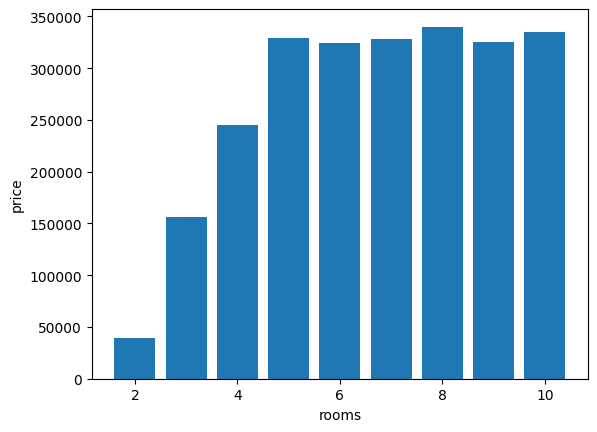

In [6]:
data=data[:900]
print(data.shape)

#  EDA ON THE DATA TAKEN
#plotting the data
#plotting rooms vs price
plot.bar(data["rooms"],data["price"])
plot.xlabel("rooms")
plot.ylabel("price")


Text(0, 0.5, 'price')

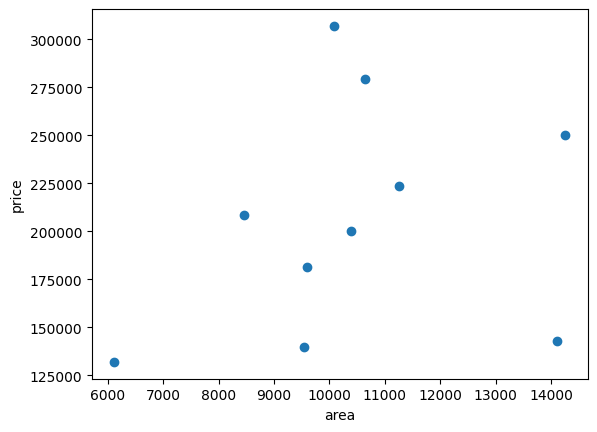

In [187]:
#plotting area vs price
plot.scatter(data["area"][:10],data["price"][:10])
plot.xlabel("area")
plot.ylabel("price")

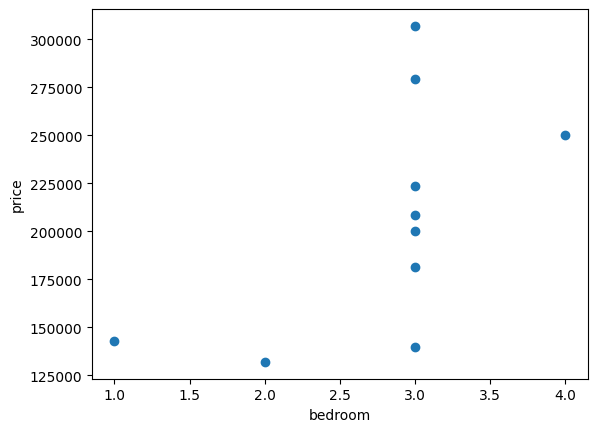

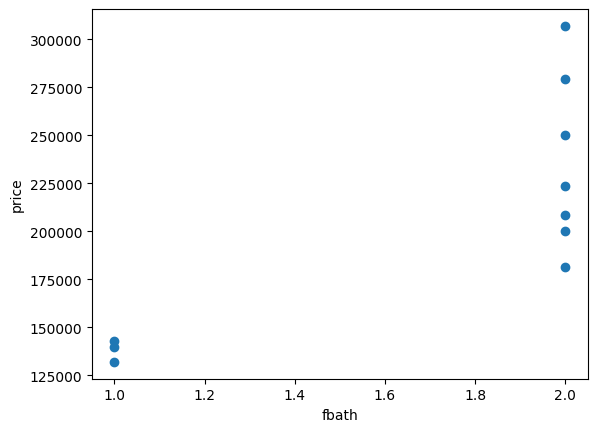

In [188]:
#plotting bedrooms vs price
col=["bedroom","fbath"]
for i in col:
    plot.scatter(data[i][:10],data["price"][:10])
    plot.xlabel(i)
    plot.ylabel("price")
    plot.show()

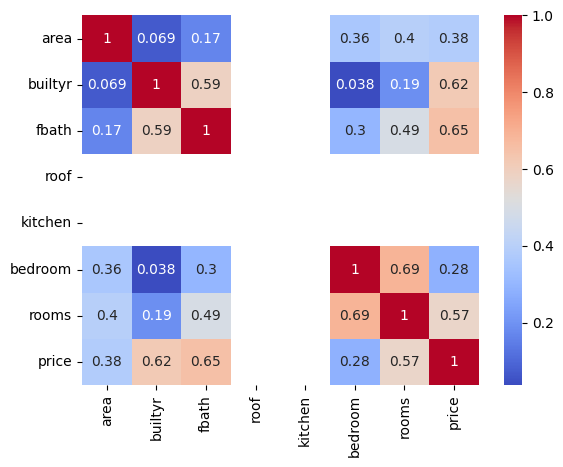

,area,builtyr,fbath,roof,kitchen,bedroom,rooms,price
0,8450,2003,2,1,1,3,8,208500
1,9600,1976,2,1,1,3,6,181500
2,11250,2001,2,1,1,3,6,223500
3,9550,1915,1,1,1,3,7,140000
4,14260,2000,2,1,1,4,9,250000


In [189]:
#correlation matrix
import seaborn as sns

correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plot.show()
data.head()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#splittingthe data for training  and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#standardising the data

scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
print(x_train)

[[-0.21289571 -0.45546896 -1.05556573 ... -0.21275711  0.13621832
  -0.96456591]
 [-0.26524463  0.71860895  0.7736639  ... -0.21275711  0.13621832
   0.27075534]
 [-0.17784146 -1.98829291 -1.05556573 ... -0.21275711 -1.10677385
  -1.58222654]
 ...
 [-0.23409563 -0.52069551 -1.05556573 ... -0.21275711 -1.10677385
  -0.96456591]
 [-0.28337613 -1.72738671 -1.05556573 ... -0.21275711  0.13621832
   0.27075534]
 [-0.65139925  1.17519481  0.7736639  ... -0.21275711 -1.10677385
   0.27075534]]


In [8]:
#training the linear regression model

from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True,positive=False)
model.fit(x_train,y_train)

#prediction using the model

y_pred=model.predict(x_test)

#evaluating the performance
from sklearn.metrics import r2_score,mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print(f"the r squared score of the model is {score}")
print(f"the mean absolute error for the model is {mae}")

the r squared score of the model is 0.6314153678970886
the mean absolute error for the model is 34125.631075065365


In [192]:
from sklearn .model_selection import GridSearchCV
model = LinearRegression()


param_grid = {
    'fit_intercept': [True, False], 
    'positive': [True, False] 
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error') # cv=5 for 5-fold cross-validation

# Fit the GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
print(best_params)


{'fit_intercept': True, 'positive': False}
